In [1]:
#include("ausgrid_nim_net_hd.jl")
include("wdm_hd.jl")

┌ Info: Precompiling PrimalDualSDDP [7d28ce30-a49f-4585-895b-ba4811baa33d]
└ @ Base loading.jl:1260


** Primal SDDP, in Hazard Decision , with 100 passes and 10 pruning  **
Primal Bellman JuMP Models initialized
Now running sddp passes


Progress:   9%|███▊                                     |  ETA: 0:03:37


 Performing pruning number 1


Progress:  19%|███████▊                                 |  ETA: 0:01:47


 Performing pruning number 2


Progress:  29%|███████████▉                             |  ETA: 0:01:06


 Performing pruning number 3


Progress:  39%|████████████████                         |  ETA: 0:00:45


 Performing pruning number 4


Progress:  49%|████████████████████▏                    |  ETA: 0:00:32


 Performing pruning number 5


Progress:  59%|████████████████████████▎                |  ETA: 0:00:23


 Performing pruning number 6


Progress:  69%|████████████████████████████▎            |  ETA: 0:00:16


 Performing pruning number 7


Progress:  79%|████████████████████████████████▍        |  ETA: 0:00:10


 Performing pruning number 8


Progress:  89%|████████████████████████████████████▌    |  ETA: 0:00:05


 Performing pruning number 9


Progress:  99%|████████████████████████████████████████▋|  ETA: 0:00:00


 Performing pruning number 10


Progress: 100%|█████████████████████████████████████████| Time: 0:00:40


** Dual SDDP with 100 passes, 10 pruning  **
Dual Bellman JuMP Models initialized
Now running sddp passes


Progress:   9%|███▊                                     |  ETA: 0:00:10


 Performing pruning number 1


Progress:  19%|███████▊                                 |  ETA: 0:00:10


 Performing pruning number 2


Progress:  29%|███████████▉                             |  ETA: 0:00:10


 Performing pruning number 3


Progress:  39%|████████████████                         |  ETA: 0:00:09


 Performing pruning number 4


Progress:  49%|████████████████████▏                    |  ETA: 0:00:08


 Performing pruning number 5


Progress:  59%|████████████████████████▎                |  ETA: 0:00:06


 Performing pruning number 6


Progress:  69%|████████████████████████████▎            |  ETA: 0:00:05


 Performing pruning number 7


Progress:  79%|████████████████████████████████▍        |  ETA: 0:00:03


 Performing pruning number 8


Progress:  89%|████████████████████████████████████▌    |  ETA: 0:00:02


 Performing pruning number 9


Progress:  99%|████████████████████████████████████████▋|  ETA: 0:00:00


 Performing pruning number 10


Progress: 100%|█████████████████████████████████████████| Time: 0:00:18


25-element Array{PrimalDualSDDP.PolyhedralFenchelTransform,1}:
 PrimalDualSDDP.PolyhedralFenchelTransform(PrimalDualSDDP.PolyhedralFunction([0.0; 0.23702664070759027; … ; 0.7027836003479102; 2.5338483620709544], [64.07557876052532, 64.22002808657705, 65.6841041554689, 64.38150225513756, 64.90980800830712]), 0.5679974452962824)
 PrimalDualSDDP.PolyhedralFenchelTransform(PrimalDualSDDP.PolyhedralFunction([4.662354865605919; 0.0; … ; 1.191238471229763; 1.6329031590566876], [62.454800599253716, 61.29414685971719, 62.77314559500556, 62.682396160281066, 61.37248321653567, 62.645462860876826, 62.55544281502945, 62.06423376443595, 62.74874284931537, 61.72963683189661, 61.86263643019362]), 0.5679974452962824)
 PrimalDualSDDP.PolyhedralFenchelTransform(PrimalDualSDDP.PolyhedralFunction([2.725968814432348; 2.071896003695883; … ; 0.2048745355532404; 0.0], [58.284154665878475, 58.14293048290594, 58.455163086098906, 57.981467689555735, 58.87545718307285, 58.98004805665486, 57.78164457729494, 58.7134

In [26]:
hour = 4
bp = collect.(unique(eachrow(D[hour].λ)))

11-element Array{Array{Float64,1},1}:
 [8.042053719798023]
 [6.569610079802518]
 [0.0]
 [8.350252058928547]
 [8.859178604270664]
 [0.9114497152585539]
 [5.753208317768586]
 [1.7799696010675696]
 [10.0]
 [4.3227888370794885]
 [5.341759767977718]

In [27]:
for pt in bp
    println(V[hour](pt)," ", Vinner[hour](pt), " ",PrimalDualSDDP.fenchel_transform_as_inf(D[hour], pt, 0.1))
end

-56.76998491597237 -56.12979878825435 -56.12979878825434
-56.76998491597237 -56.04057078943911 -56.04057078943917
-55.53437689975651 -54.782065267586184 -55.40725923141075
-56.76998491597237 -56.14773184767701 -56.147731847676994
-56.76998491597237 -56.167563809238416 -56.1675638092384
-55.818077447816684 -55.055917382178585 -55.4984042029366
-56.76998491597237 -55.97488250232507 -55.974882502325045
-56.08841552953442 -55.28780442579556 -55.5852561915175
-56.76998491597237 -56.20051213854965 -56.200512138549634
-56.76998491597237 -55.804630066109304 -55.83953811511869
-56.76998491597237 -55.94143520820852 -55.94143520820853


In [28]:
using Polyhedra, CDDLib

In [29]:
v = convexhull([[pt[1], Vinner[hour](pt)] for pt in bp]...) #+ conichull(Ray([0., 1.])) 
p = polyhedron(v, CDDLib.Library())

Polyhedron CDDLib.Polyhedron{Float64}:
11-element iterator of Array{Float64,1}:
 [8.042053719798023, -56.12979878825435]
 [6.569610079802518, -56.04057078943911]
 [0.0, -54.782065267586184]
 [8.350252058928547, -56.14773184767701]
 [8.859178604270664, -56.167563809238416]
 [0.9114497152585539, -55.055917382178585]
 [5.753208317768586, -55.97488250232507]
 [1.7799696010675696, -55.28780442579556]
 [10.0, -56.20051213854965]
 [4.3227888370794885, -55.804630066109304]
 [5.341759767977718, -55.94143520820852]

In [30]:
hrep(p)

H-representation CDDInequalityMatrix{Float64,Float64}:
11-element iterator of HalfSpace{Float64,Array{Float64,1}}:
 HalfSpace([-1.0, -25.66193685713428], 1432.5092972874659)
 HalfSpace([-1.0, -16.50203590293036], 918.2139011082324)
 HalfSpace([-1.0, -12.301400177782673], 682.8162212476973)
 HalfSpace([-1.0, -4.920071756634132], 270.23999544060064)
 HalfSpace([-1.0, -3.7454437827222398], 205.29739374589153)
 HalfSpace([-1.0, -3.3282551665344893], 182.32869176027333)
 HalfSpace([-1.0, -7.4483379444757025], 411.3289547617511)
 HalfSpace([-1.0, -12.42842214193519], 689.9262607663491)
 HalfSpace([-1.0, -17.186043489117466], 956.6071092905541)
 HalfSpace([1.0, 7.049964439773264], -386.2116120738207)
 HalfSpace([-1.0, -34.62455971447672], 1935.917988525386)

In [31]:
Vouter = PrimalDualSDDP.PolyhedralFunction()
for h in halfspaces(p)
    λ = h.a
    γ = h.β
    if λ[end] < 0.
        PrimalDualSDDP.add_cut!(Vouter, λ[1:end-1]./(-λ[end]), γ/λ[end])
    end
end
Vouter

PrimalDualSDDP.PolyhedralFunction([-0.03896821995811239; -0.060598583464627195; … ; -0.058186749069570276; -0.02888123367477492], [-55.82233738873899, -55.64246172468817, -55.50719522814312, -54.92602726295894, -54.81256845795682, -54.78206526758619, -55.224260476369274, -55.51197512341038, -55.66185782645646, -55.9116998018019])

In [32]:
Vlb = PrimalDualSDDP.remove_cut(V[hour], 1)
Vub = Vouter

PrimalDualSDDP.PolyhedralFunction([-0.03896821995811239; -0.060598583464627195; … ; -0.058186749069570276; -0.02888123367477492], [-55.82233738873899, -55.64246172468817, -55.50719522814312, -54.92602726295894, -54.81256845795682, -54.78206526758619, -55.224260476369274, -55.51197512341038, -55.66185782645646, -55.9116998018019])

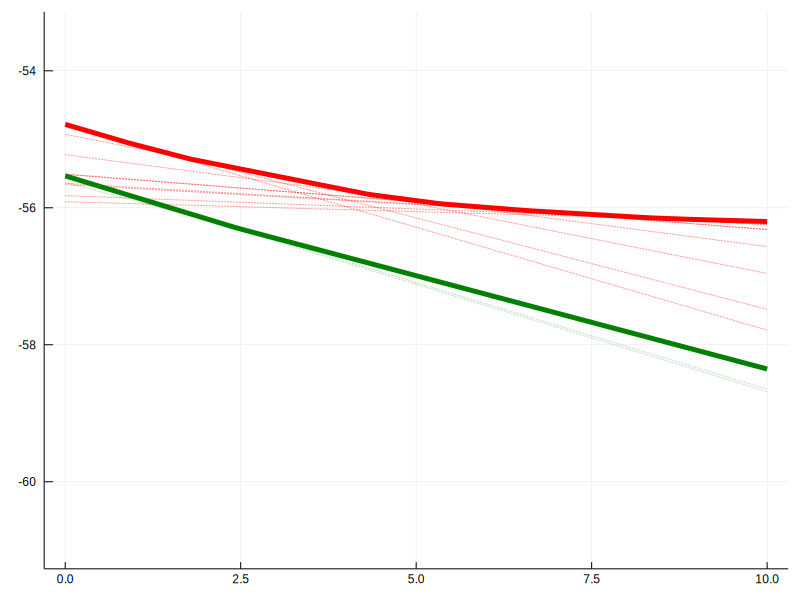

In [33]:
using Plots

xrange = collect(0.:0.1:10.)
Vubvals = Vub.(collect.(eachrow(xrange)))
Vlbvals = Vlb.(collect.(eachrow(xrange)))
Plots.plot(; leg=false, ylim = (minimum(Vlbvals)-0.05*(abs(minimum(Vlbvals))), maximum(Vubvals) + 0.03*abs(maximum(Vubvals))))
for (λ, γ) in PrimalDualSDDP.eachcut(Vlb)
    Plots.plot!(xrange, λ[1].*xrange .+ γ, color = :green, alpha = 0.5, style = :dot)
end
for (λ, γ) in PrimalDualSDDP.eachcut(Vub)
    Plots.plot!(xrange, λ[1].*xrange .+ γ, color = :red, alpha = 0.8, style = :dot)
end
Plots.plot!(xrange, Vubvals, color = :red, linewidth = 5)
Plots.plot!(xrange, Vlbvals, color = :green, linewidth = 5, size = (800, 600))